# Assessment of curation quality by using MorphoNet Data module

This notebook will explore one example of curation quality assessment, using the evaluation of cell geometry in the embryo

## Installing MorphoNet

The first step to explore the curation quality using MorphoNet modules is to install MorphoNet
Head to MorphoNet [download webpage](https://morphonet.org/downloads) , and download the CPU Linux application , in the stable section.

For the rest of the session, you will need samples data to work with. You can download some data following [this link]().

The data contains : 

    - segmentation images for 30 time points
    - correpsonding intensity images
    - Properties for the cells in the images (cell_volumes and cell_lineage)
   
With all of this is downloaded, you can start the application

## Load the dataset in MorphoNet

On the MorphoNet main page, you can see the list of available public datasets of MorphoNet. In this session, we will focus on creating a local dataset. 

Click on the "Add dataset" button to open the panel to add a dataset.

On the window, you will see 3 panels (segmentation , intensities, properties)

### Segmentations 

First we will add the segmentation images. Click the add images button, and pick the segmentation folder previously downloaded. 
By picking the folder , all images will be loaded automatically. Please make sure to verify the metadatas when prompted (especially voxel size, should 0.6 x 0.6 x 0.6)

When added to the main panel , please verify that the background value is set (should be 1) , and change the mesh sliders to 2. Those sliders specify the reduction of quality for the visualization. The lowers the better quality , but the slower to compute.

### Intensities

When done, please head to the intensities images panel, and click on add images. Once again, pick the intensity images folder, and import it. Make sure to verify the metadata of the images, especially the voxel size.

When the images have been added, make sure to lower the quality reduction applied to intensity images for visualization to 2.

### Properties

Finally , head to the properties panel, and select the properties.xml file in the field to add the properties.

When everything is done, please change the dataset name to your liking, and press the start button. MorphoNet should now be loading the dataset.

## Load the local dataset in the module

In [1]:
from morphonet.data import get_local_dataset
dataset_name = "180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020"
morphonet_dataset = get_local_dataset(dataset_name)

print("min time : "+str(morphonet_dataset.get_min_time()))
print("max time : "+str(morphonet_dataset.get_max_time()))

min time : 20
max time : 80


Now that the dataset is loaded, we can interact with the history of the curation. 

So, at every step, we can access the status of the dataset through :
    
    - the segmentation images 
    - the properties of the different objects
    - the action applied at the current step (which plugins, which parameters and on which objects)
    - the raw data

For the curation, we are going to use the compactness of the cells to find segmentation errors. But, the compactness is not present in the given property files. We will need to compute the compactness for all the time points.

In [2]:
cell_compactness = morphonet_dataset.get_property("compactness")
print("cell compactness : "+str(cell_compactness))

180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t28_ch0.regions.pickle
28 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t80_ch0.regions.pickle
80 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t46_ch0.regions.pickle
46 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t25_ch0.regions.pickle
25 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t35_ch0.regions.pickle
35 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t56_ch0.regions.pickle
56 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t38_ch0.regions.pickle
38 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t66_ch0.regions.pickle
66 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t76_ch0.regions.pickle
76 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t75_ch0.regions.pickle
75 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t78_ch0.regions.pickle
78 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t68_ch0.regions.pickle
68 - 0
180824-Emilie-No

Here, the cell compactness is None, meaning that it wasn't found, as expected. We should compute it : 

In [3]:
cell_compactness = morphonet_dataset.compute_property("compactness",step=0,save=True)
print("cell compactness : "+str(cell_compactness))

180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t28_ch0.regions.pickle
28 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t80_ch0.regions.pickle
80 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t46_ch0.regions.pickle
46 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t25_ch0.regions.pickle
25 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t35_ch0.regions.pickle
35 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t56_ch0.regions.pickle
56 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t38_ch0.regions.pickle
38 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t66_ch0.regions.pickle
66 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t76_ch0.regions.pickle
76 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t75_ch0.regions.pickle
75 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t78_ch0.regions.pickle
78 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t68_ch0.regions.pickle
68 - 0
180824-Emilie-No

After computing the property, we can read the values in python. But the most important thing is to display it on MorphoNet. 
The compute property function used above computed and added the property into the dataset. We can load the compactness property from the properties menu, and access it.

We can still visualize the compactness in python. For example its distribution

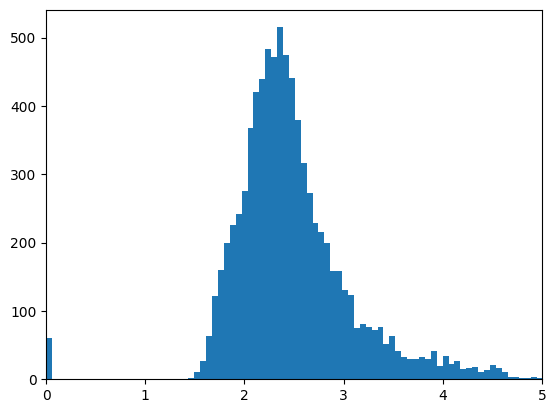

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt #import the module to plot the distribution

list_of_values = cell_compactness.get_values()
plt.hist(list_of_values,bins='auto')
plt.xlim([0,5])
plt.show()
plt.clf()

The list of computable properties can be accessed with the following function : 

In [5]:
morphonet_dataset.print_computable_properties()

['area', 'area_bbox', 'bbox', 'volume_real', 'volume_filled', 'convexity', 'axis_major_length', 'axis_minor_length', 'axis_ratio', 'diameter', 'equivalent_diameter_area', 'euler_number', 'extent', 'connected_neighbors', 'roughness', 'compactness', 'smoothness', 'intensity_max', 'intensity_mean', 'intensity_min', 'intensity_border_variation', 'intensity_offset', 'lineage_distance']


Now that the compactness has been computed , we can go into MorphoNet , load the dataset, and display the compactness property. 
Using compactness as a colormap will help spotting cells with segmentation errors :

    - 17,283 + 17,69
    
After cell curation , we can now compute the compactness again :



In [5]:
cell_compactness_after_curation = morphonet_dataset.compute_property("compactness",save=True) # compute the new values for compactness
print("cell compactness : "+str(cell_compactness))

180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t28_ch0.regions.pickle
28 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t80_ch0.regions.pickle
80 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t46_ch0.regions.pickle
46 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t25_ch0.regions.pickle
25 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t35_ch0.regions.pickle
35 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t56_ch0.regions.pickle
56 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t38_ch0.regions.pickle
38 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t66_ch0.regions.pickle
66 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t76_ch0.regions.pickle
76 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t75_ch0.regions.pickle
75 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t78_ch0.regions.pickle
78 - 0
180824-Emilie-Nodal-St8_intrareg_post_t020_seg_t020_t68_ch0.regions.pickle
68 - 0
180824-Emilie-No

We can visualize it in MorphoNet , and plot its distribution again. But we could go further, and make a direct comparison of the distributions of the compactness, and see that the highest values, usually coming from segmentation errors 

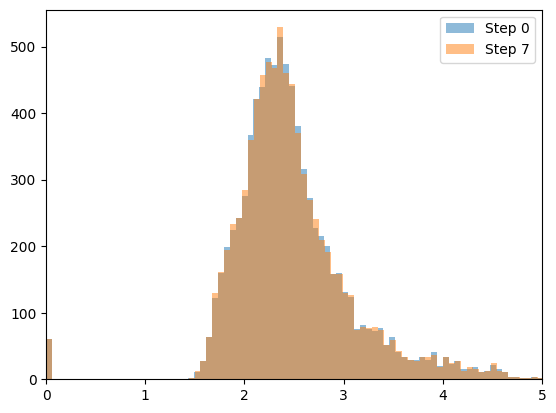

<Figure size 640x480 with 0 Axes>

In [6]:
list_of_values_before = cell_compactness.get_values()
list_of_values_after = cell_compactness_after_curation.get_values()
plt.hist(list_of_values_before,bins='auto',label="Step 0",alpha=0.5)
plt.hist(list_of_values_after,bins='auto',label="Step "+str(morphonet_dataset.get_number_of_curations()),alpha=0.5)
plt.xlim([0,5])
plt.legend()
plt.show()
plt.clf()